In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


# Load the cleaned dataset
df = pd.read_csv('/content/tide_trevel_query_results_all (1).csv')

In [4]:
# Check the basic info and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37967 entries, 0 to 37966
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 37967 non-null  int64  
 1   age                     37967 non-null  int64  
 2   gender                  37967 non-null  object 
 3   married                 37967 non-null  int64  
 4   has_children            37967 non-null  int64  
 5   home_country            37967 non-null  object 
 6   home_city               37967 non-null  object 
 7   home_airport            37967 non-null  object 
 8   sign_up_date            37967 non-null  object 
 9   total_sessions          37967 non-null  int64  
 10  avg_clicks              37967 non-null  float64
 11  flights_booked          37967 non-null  int64  
 12  hotels_booked           37967 non-null  int64  
 13  total_cancellations     37967 non-null  int64  
 14  total_session_time      37967 non-null

In [ ]:
# Check the first few rows of the dataset
df.head()

,user_id,age,gender,married,has_children,home_country,home_city,home_airport,sign_up_date,total_sessions,...,session_category,booking_type,checked_bags,nights,flight_discount_amount,hotel_discount_amount,total_flight_spent,total_hotel_spent,total_spent,discount_sensitivity
0,94883,53,F,1,0,usa,kansas city,MCI,2022-02-07,8,...,browsing,flight_and_hotel,1,1,0.0,0.0,481.84,260.0,741.84,0.0
1,94883,53,F,1,0,usa,kansas city,MCI,2022-02-07,8,...,browsing,flight_and_hotel,1,1,0.0,0.0,481.84,100.0,581.84,0.0
2,94883,53,F,1,0,usa,kansas city,MCI,2022-02-07,8,...,browsing,flight_and_hotel,1,1,0.0,0.0,1246.34,260.0,1506.34,0.0
3,94883,53,F,1,0,usa,kansas city,MCI,2022-02-07,8,...,browsing,flight_and_hotel,1,1,0.0,0.0,1246.34,100.0,1346.34,0.0
4,101486,53,F,1,1,usa,tacoma,TCM,2022-02-17,8,...,browsing,flight_and_hotel,0,8,0.0,0.0,189.91,4048.0,4237.91,0.0


In [ ]:
df.isnull().sum()

,0
user_id,0
age,0
gender,0
married,0
has_children,0
home_country,0
home_city,0
home_airport,0
sign_up_date,0
total_sessions,0


In [ ]:
print(df.columns)

Index(['user_id', 'age', 'gender', 'married', 'has_children', 'home_country',
       'home_city', 'home_airport', 'sign_up_date', 'total_sessions',
       'avg_clicks', 'flights_booked', 'hotels_booked', 'total_cancellations',
       'total_session_time', 'avg_session_duration', 'session_category',
       'booking_type', 'checked_bags', 'nights', 'flight_discount_amount',
       'hotel_discount_amount', 'total_flight_spent', 'total_hotel_spent',
       'total_spent', 'discount_sensitivity'],
      dtype='object')


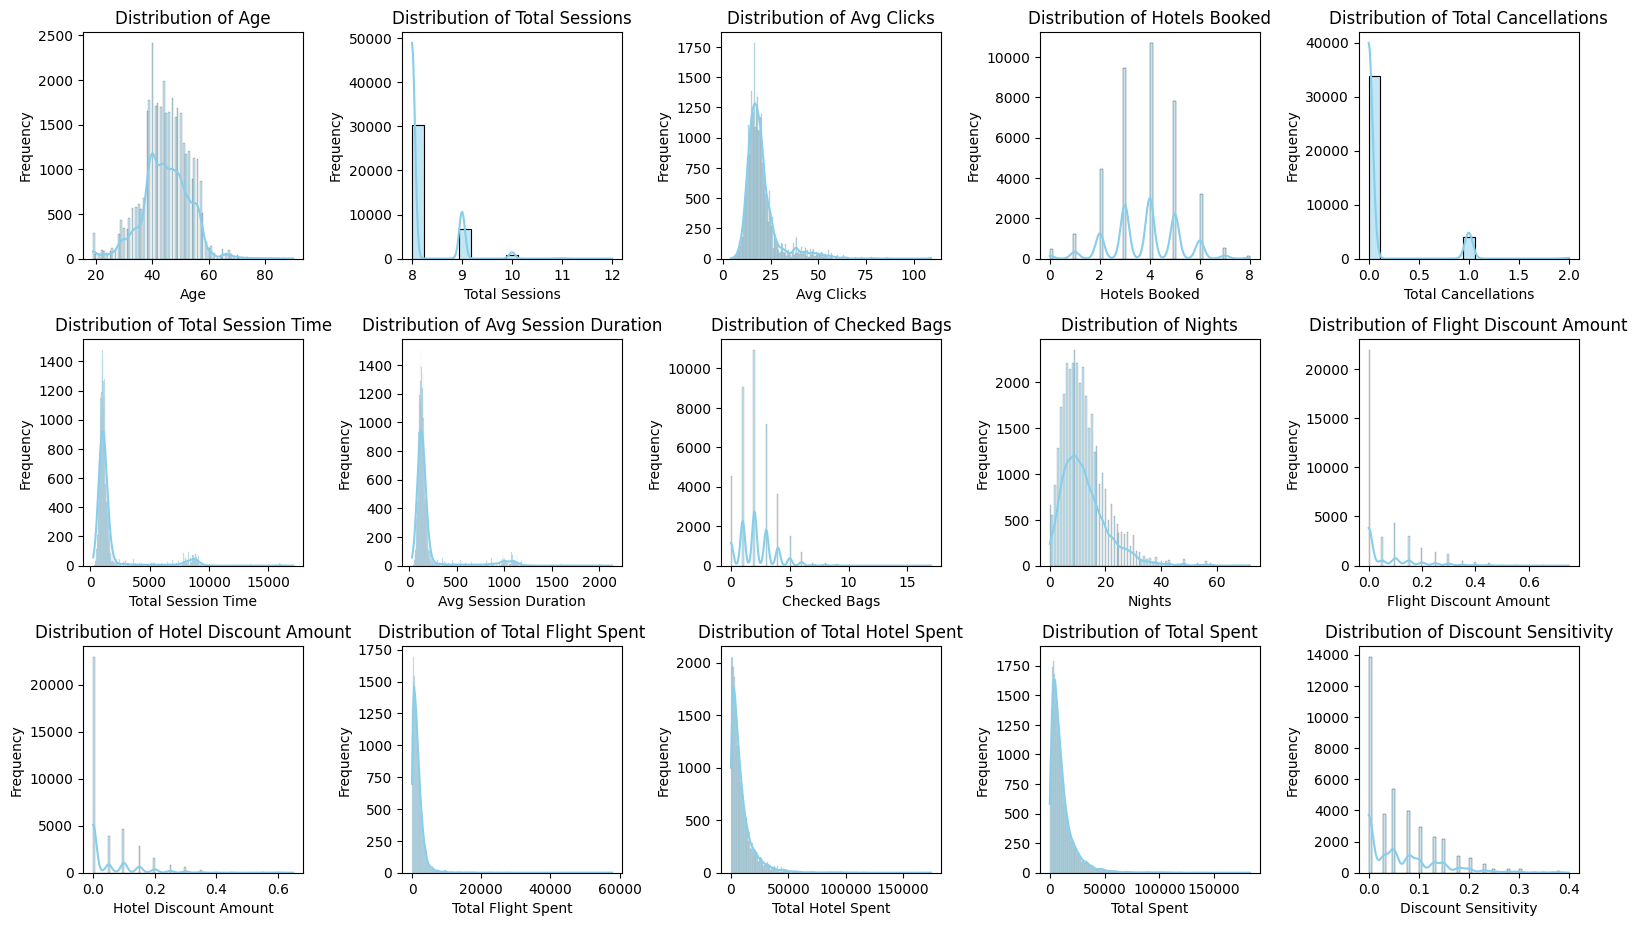

In [ ]:
# List of numerical columns
numerical_columns = [ 'age',
       'total_sessions',
       'avg_clicks',  'hotels_booked', 'total_cancellations',
       'total_session_time', 'avg_session_duration',
        'checked_bags', 'nights', 'flight_discount_amount',
       'hotel_discount_amount', 'total_flight_spent', 'total_hotel_spent',
       'total_spent', 'discount_sensitivity'
       ]

# Visualize Histograms for All Numerical Columns in Raw DataFrame
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)  # Adjust the number of rows and columns
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


 **Demographics & Behavior**

Age: Roughly normal distribution centered around 35–40 years. Light right skew, some outliers above 70.

Total Sessions: Very low variance — nearly all users have exactly 9 sessions. Indicates a potential data constraint or fixed sampling.

Avg Clicks: Right-skewed with most users clicking 5–30 times per session. Outliers > 50.

**Travel Behavior**

Hotels Booked: Multimodal — peaks at whole numbers (1, 2, 3...), likely due to discrete booking habits.

Total Cancellations: Mostly 0, some 1s — strongly imbalanced.

Checked Bags: Discrete spikes — likely counts (0, 1, 2…). Max around 15 suggests outliers or group bookings.

Nights Stayed: Right-skewed, most stays < 20 nights, tail stretches to 60+.

Flight & Hotel Discounts: Very sparse; most discounts are minimal (<0.1). Some spikes may relate to specific offers or loyalty tiers.

 **Digital Engagement**

Total Session Time & Avg Session Duration: Heavy right skew, long tail — majority of users spend <1000 seconds total.

Avg Session Duration is highly variable — indicates diverse usage behavior.

**Spending Patterns**

Total Flight & Hotel Spent: Heavily skewed to the right; most users spend relatively little, a few spend >$50,000.

Total Spent: Similar right-skew — bulk of users in lower range.

Discount Sensitivity: Most users have very low sensitivity (close to 0), indicating that discounts don’t heavily influence decisions for many.

**Key Takeaways**
___
Right-skewed financial features — needs normalization before clustering.

Highly imbalanced variables — e.g., cancellations, sessions, and discounts — may require resampling or adjusted weighting.

Multimodal patterns — in discrete data like bags or hotels — suggests clustering by behavior type.

Engagement features (clicks/duration) — show wide spread and could segment users by browsing vs booking behavior.

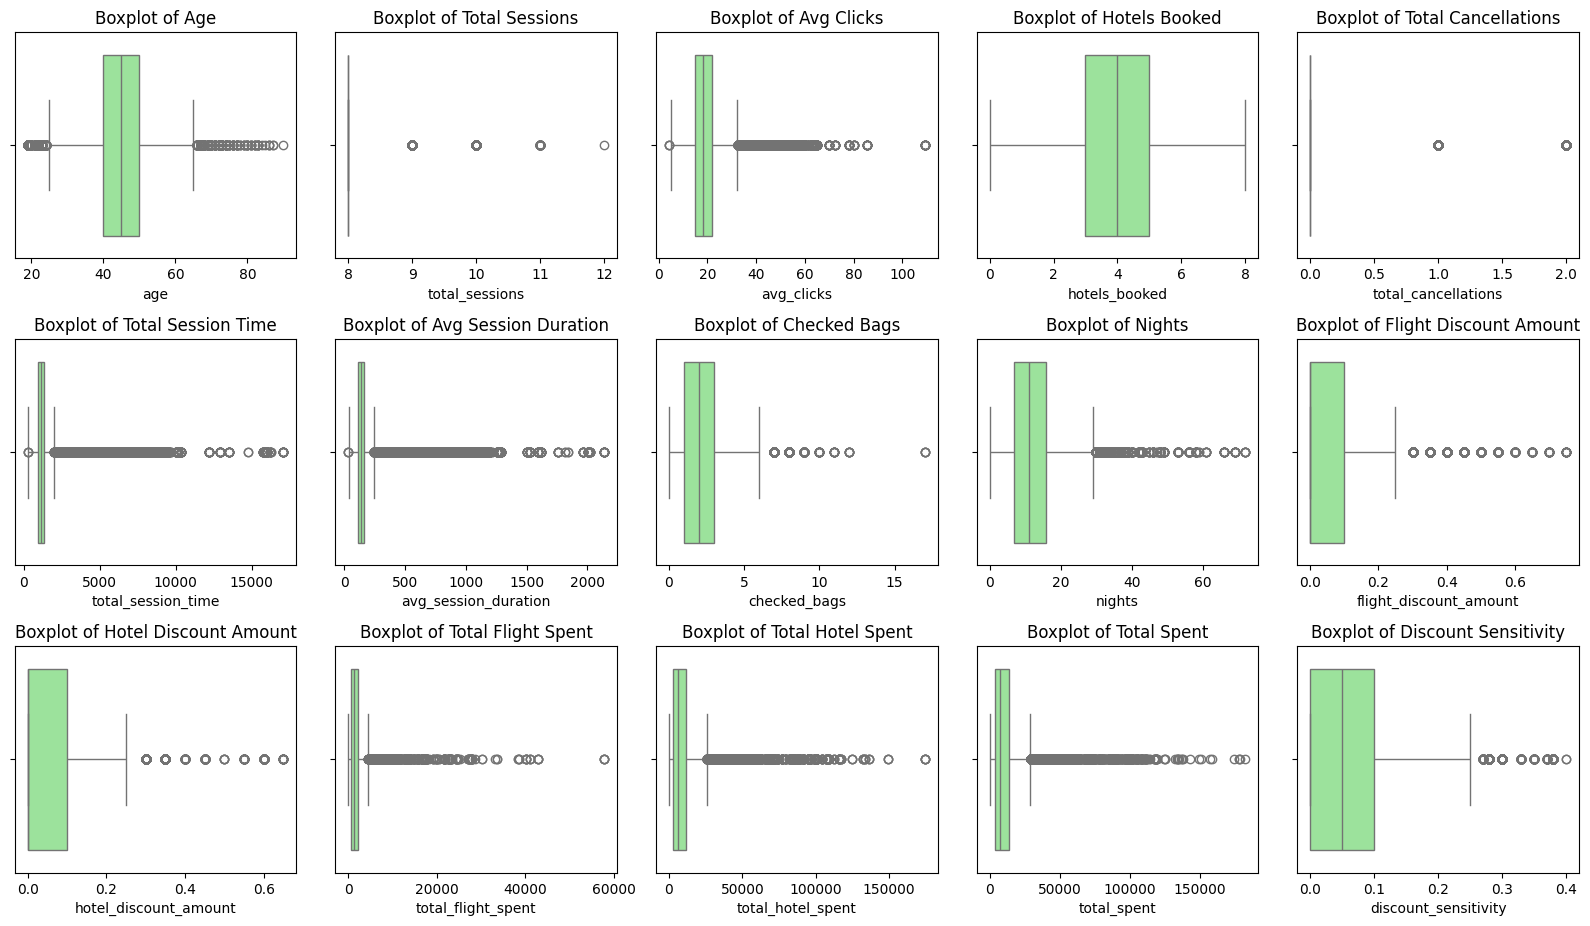

In [ ]:
# Visualize Boxplots for All Numerical Columns in Raw DataFrame
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

**Demographics & Engagement**

Age: Symmetrical distribution with mild outliers above 60. Central range ~30–45.

Total Sessions: Almost no variability — all users have 9, with rare outliers at 10–11. Indicates a fixed design or sampling constraint.

Avg Clicks: Median ~15. Heavy right tail with numerous outliers up to 100+. High engagement in a small subset.

Avg Session Duration / Total Session Time: Long right tails, strong presence of outliers. Most users are below 500s (avg) and 2000s (total), but some go beyond 10,000s.

**Travel & Booking Behavior**

Hotels Booked: Central values between 2 and 6. Occasional users book 7–8 hotels (potential outliers).

Total Cancellations: Majority at 0; a few clear outliers at 1–2. Strong imbalance.

Checked Bags: Most users travel with ≤2 bags, but long-tail behavior shows a few users with 8–15+ bags (likely group travelers or business segments).

Nights Stayed: Median around 10. Heavy outliers extend beyond 60 nights, possibly long-term or multi-destination travelers.

**Discounts & Spending Patterns**

Flight & Hotel Discount Amounts: Low medians, high outliers suggest rare but substantial promotions for a small subset.

Discount Sensitivity: Mostly concentrated below 0.1, but some users show significantly higher responsiveness to discounts (outliers).

Total Flight/Hotel/Overall Spent:

Medians are low compared to extreme outliers.

Total Hotel Spent and Total Spent show users spending >$100,000 — these are strong outliers, likely premium or business travelers.

Heavy skewness suggests strong heterogeneity in customer value.

**Summary Observations**
___
Outlier Presence:

Widespread across most variables, especially monetary ones.

Suggests a need for robust scaling or outlier handling (e.g., IQR filtering) for modeling.

Skewed Distributions:

Financial and time-based features are right-skewed, indicating non-normality. Log transformation or quantile scaling is advisable.

Variable Segmentation Insight:

Discount-related features and spending have distinct outlier subgroups — likely useful for segmentation (e.g., value-seekers vs high spenders).

Session duration and clicks also differentiate passive vs highly active users.


In [12]:
# Aggregation dictionary for features
agg_funcs = {
    'age': 'first',
    'gender': 'first',
    'married': 'first',
    'has_children': 'first',
    'home_country': 'first',
    'total_sessions': 'sum',
    'avg_clicks': 'mean',
    'flights_booked': 'sum',
    'hotels_booked': 'sum',
    'total_cancellations': 'sum',
    'total_session_time': 'sum',
    'avg_session_duration': 'mean',
    'checked_bags': 'sum',
    'nights': 'sum',
    'flight_discount_amount': 'sum',
    'hotel_discount_amount': 'sum',
    'total_flight_spent': 'sum',
    'total_hotel_spent': 'sum',
    'total_spent': 'sum',
    'discount_sensitivity': 'mean'
}

# Apply aggregation
df_user = df.groupby('user_id').agg(agg_funcs).reset_index()

duplicated_users = df_user['user_id'].duplicated().sum()
print(f"Number of duplicated users: {duplicated_users}")

Number of duplicated users: 0


In [13]:

# Create new features
df_user['total_bookings'] = df_user['flights_booked'] + df_user['hotels_booked']
df_user['booking_ratio'] = df_user['total_bookings'] / df_user['total_sessions']
df_user['spending_per_session'] = df_user['total_spent'] / df_user['total_sessions']
df_user['discount_ratio'] = (df_user['flight_discount_amount'] + df_user['hotel_discount_amount']) / df_user['total_spent']
df_user['avg_nights_per_booking'] = df_user['nights'] / (df_user['hotels_booked'].replace(0, 1))  # Avoid division by zero

# Drop non-numeric and categorical columns before clustering
clustering_df = df_user.select_dtypes(include=['float64', 'int64']).drop(columns=['user_id'])

# Check the cleaned and enriched dataset
df_user.head(), clustering_df.head()


(   user_id  age gender  married  has_children home_country  total_sessions  \
 0    94883   53      F        1             0          usa              32   
 1   101486   53      F        1             1          usa              16   
 2   106907   47      F        1             1          usa               8   
 3   118043   53      F        0             1          usa              96   
 4   125845   42      F        1             0          usa              72   
 
    avg_clicks  flights_booked  hotels_booked  ...  hotel_discount_amount  \
 0        9.13               8              8  ...                    0.0   
 1       16.38               2              4  ...                    0.0   
 2       30.00               2              2  ...                    0.0   
 3       20.50              36             48  ...                    3.6   
 4       19.75              27             27  ...                    0.0   
 
    total_flight_spent  total_hotel_spent  total_spent  disc

Now cleaned and aggregated the data into one row per user, and created key behavioral features for clustering.

In [14]:
clustering_df.columns

Index(['age', 'married', 'has_children', 'total_sessions', 'avg_clicks',
       'flights_booked', 'hotels_booked', 'total_cancellations',
       'total_session_time', 'avg_session_duration', 'checked_bags', 'nights',
       'flight_discount_amount', 'hotel_discount_amount', 'total_flight_spent',
       'total_hotel_spent', 'total_spent', 'discount_sensitivity',
       'total_bookings', 'booking_ratio', 'spending_per_session',
       'discount_ratio', 'avg_nights_per_booking'],
      dtype='object')

**23 numeric features:**

Demographics: age, married, has_children

Activity: total_sessions, avg_clicks, total_session_time, avg_session_duration

Bookings: flights_booked, hotels_booked, total_cancellations, checked_bags, nights, total_bookings

Spending: total_flight_spent, total_hotel_spent, total_spent, spending_per_session

Discount Behavior: flight_discount_amount, hotel_discount_amount, discount_ratio, discount_sensitivity

Derived Behavior: booking_ratio, avg_nights_per_booking.

Segment users into meaningful behavioral clusters that can guide retention offers like:

Free hotel meal

Free checked bag

No cancellation fees

Exclusive discounts

1-night free hotel with flight

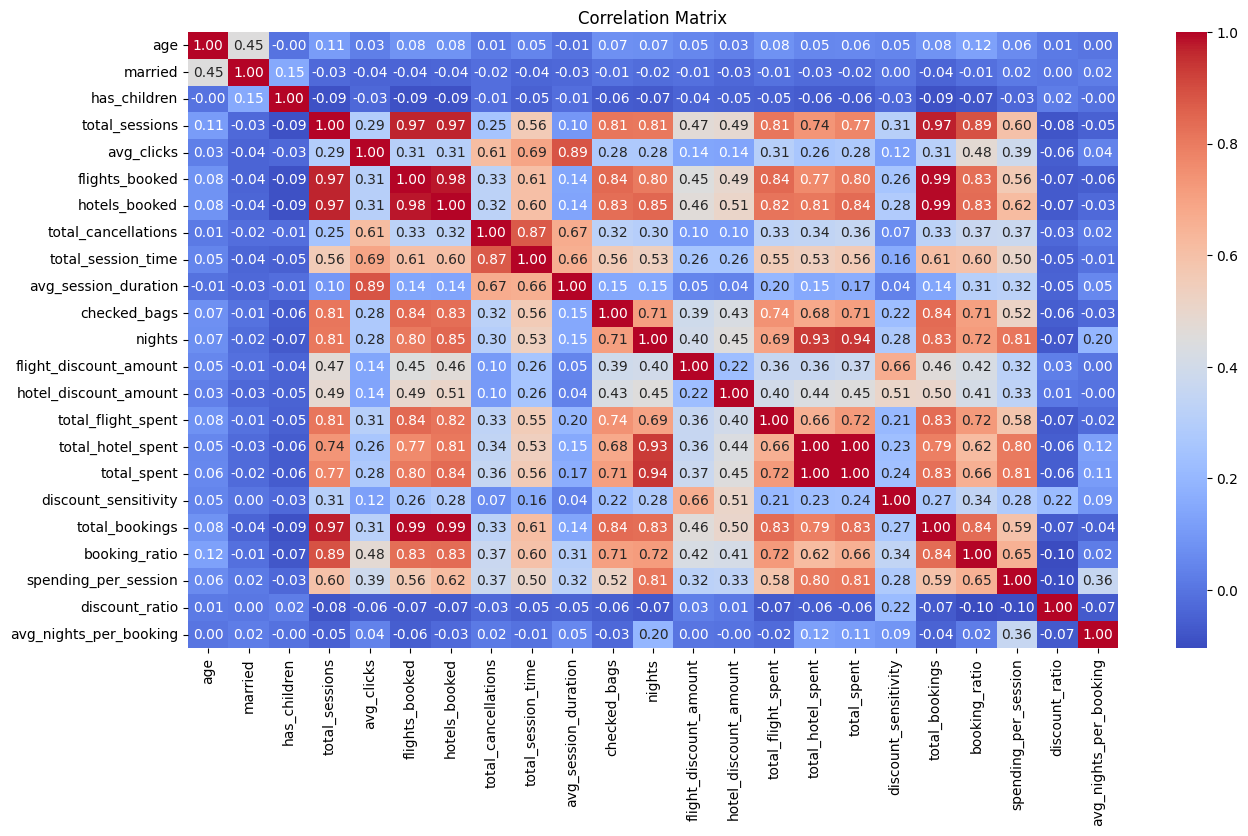

In [15]:
corr_matrix = clustering_df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [16]:
#Remove outliers using the IQR method
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Keep data within 1.5 * IQR
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Apply IQR outlier removal
clustering_df_clean = remove_outliers_iqr(clustering_df)
#Reduced to 2,460 unique users

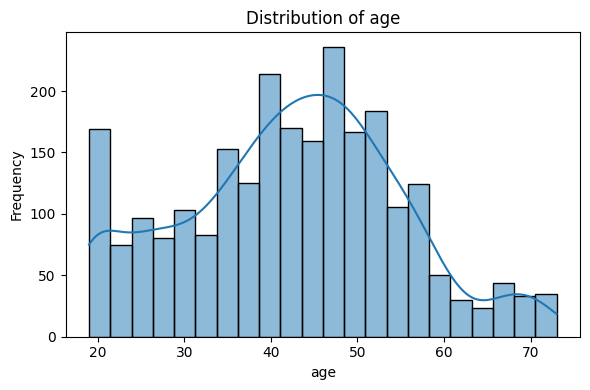

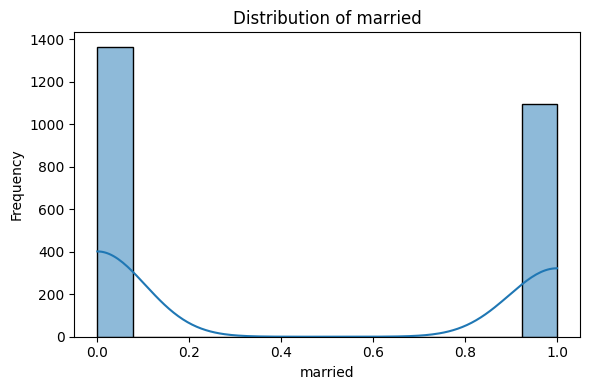

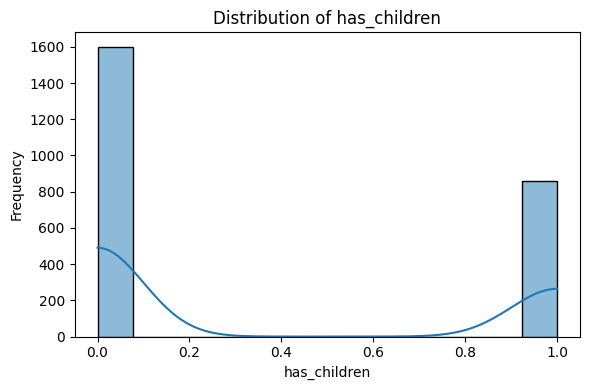

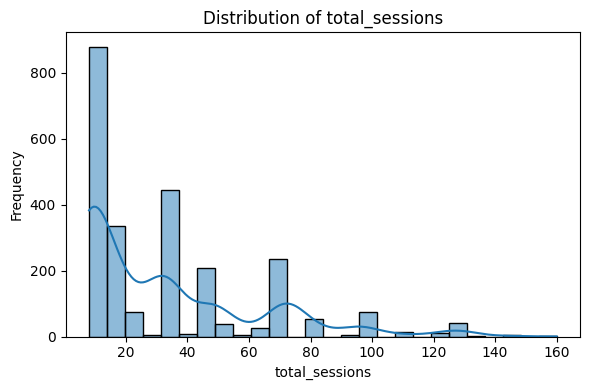

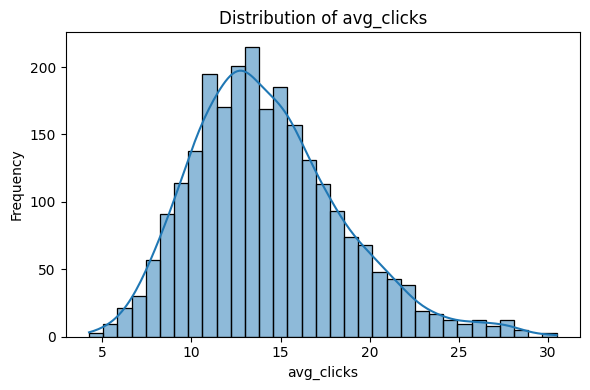

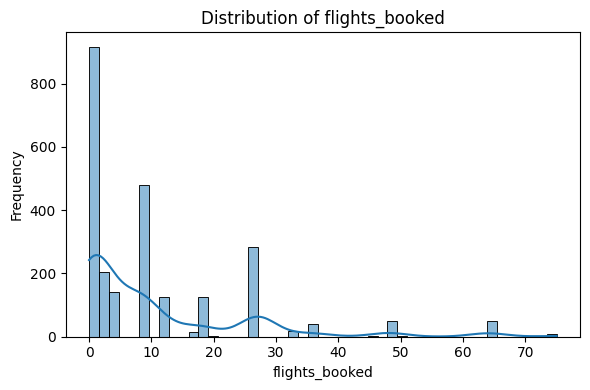

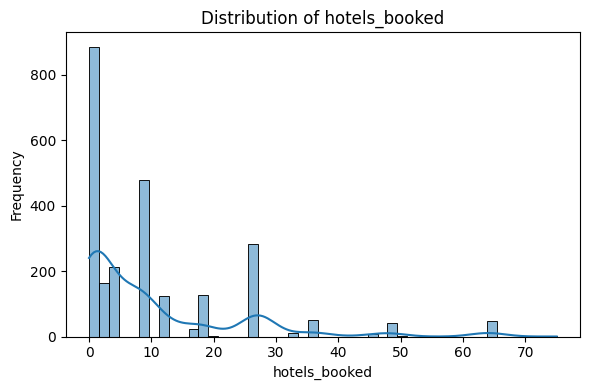

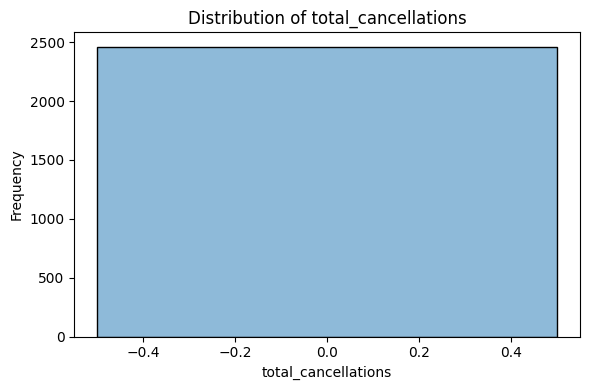

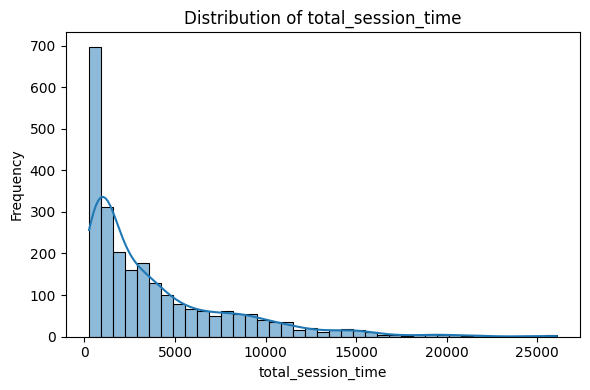

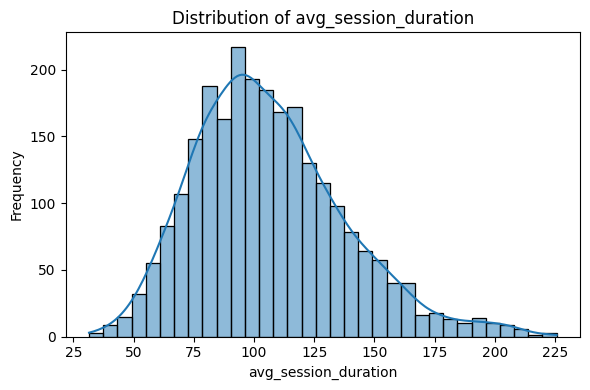

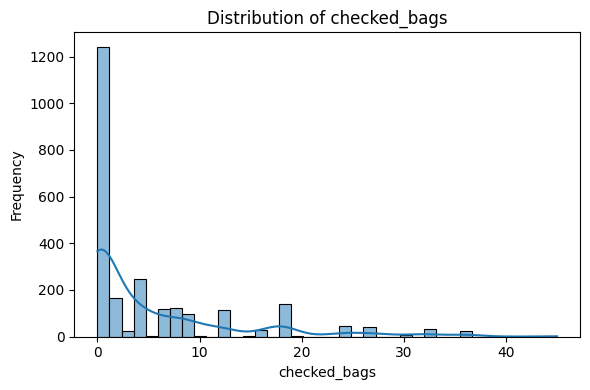

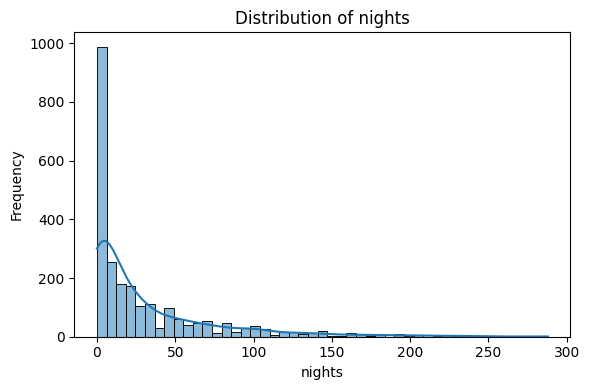

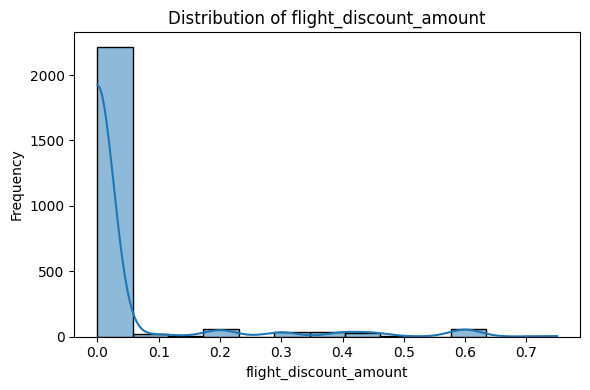

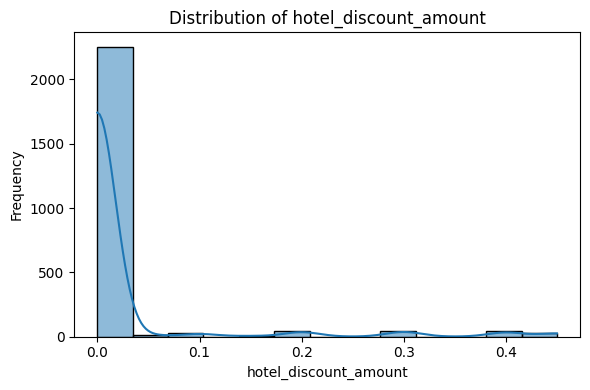

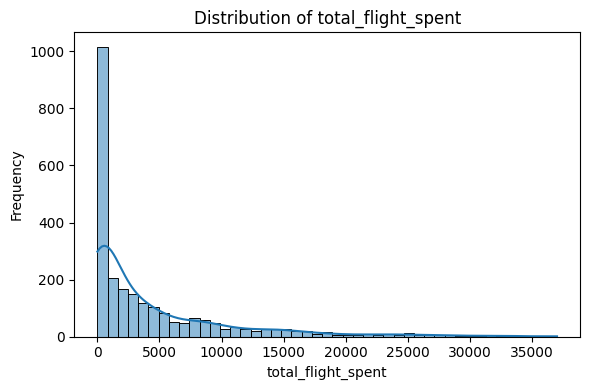

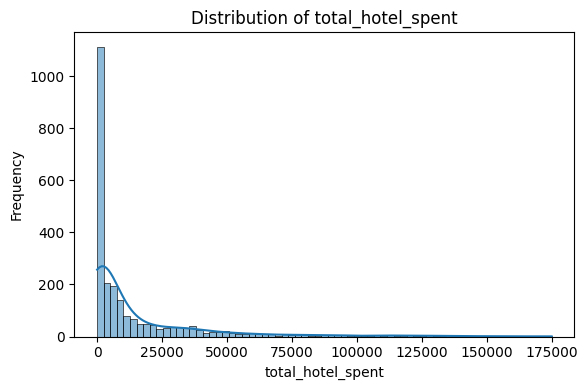

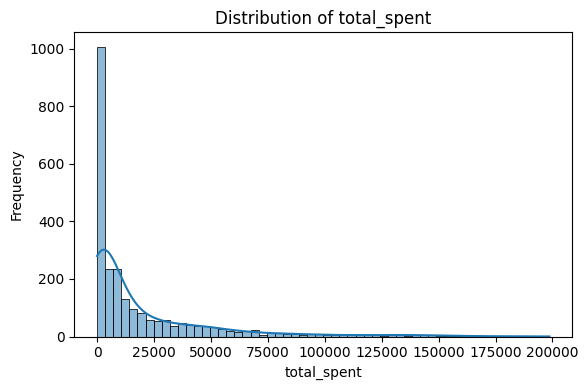

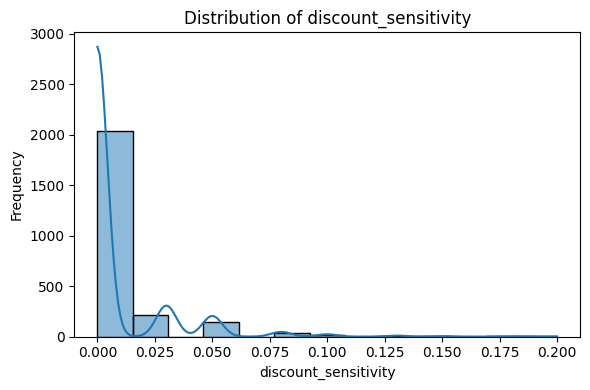

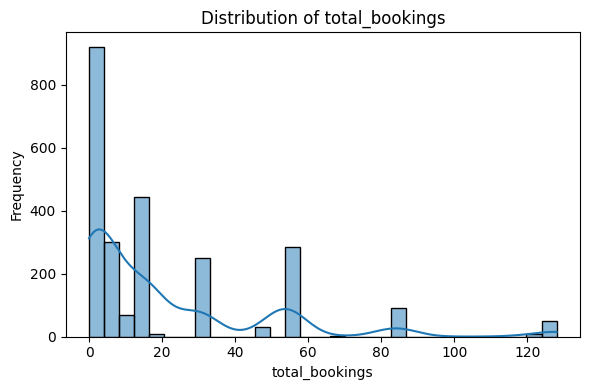

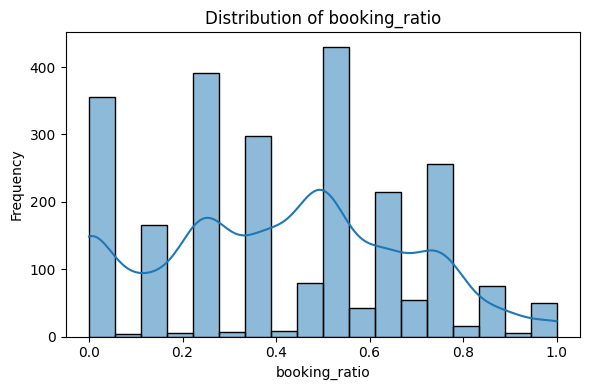

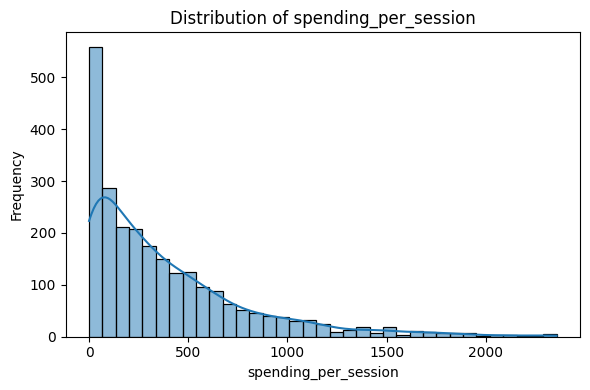

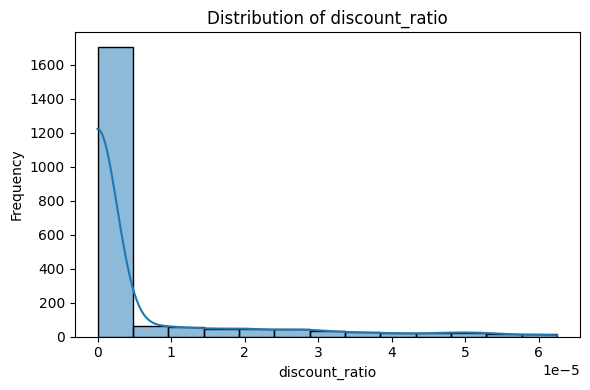

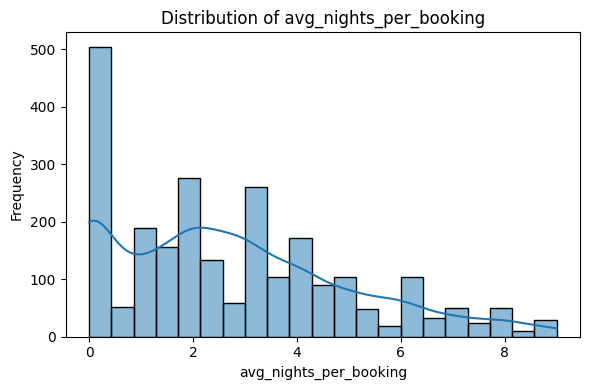

In [17]:
for column in clustering_df_clean.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(clustering_df_clean[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [18]:
# Normalize the data
scaler = StandardScaler()
clustering_df_scaled = scaler.fit_transform(clustering_df_clean) #Standardized all 23 numeric features using Z-score

# Output shape and a small preview of normalized data
clustering_df_clean.shape, clustering_df_scaled[:5]

((2460, 23),
 array([[ 0.84347835,  1.11650138, -0.73314391, -0.03322188, -1.21687741,
         -0.16198269, -0.16123304,  0.        , -0.41579289, -1.2310949 ,
         -0.16351109, -0.61054448, -0.30058608, -0.27233118, -0.14158708,
         -0.54504456, -0.49915725, -0.39091899, -0.16364583,  0.34870304,
         -0.61705771, -0.40753057, -0.98915325],
        [ 0.84347835,  1.11650138,  1.36398868, -0.57445245,  0.5019073 ,
         -0.59114522, -0.45917354,  0.        , -0.46767898,  0.51089053,
         -0.65766008, -0.34106177, -0.30058608, -0.27233118, -0.63583771,
         -0.33435085, -0.41659984, -0.39091899, -0.53311055, -0.12662172,
          0.09659608, -0.40753057,  0.56247618],
        [-1.76335047, -0.89565496, -0.73314391, -0.84506774, -1.21687741,
         -0.6626723 , -0.75711404,  0.        , -0.81301515, -1.21894895,
         -0.65766008, -0.70037205, -0.30058608, -0.27233118, -0.62881885,
         -0.57197984, -0.6203979 , -0.39091899, -0.7178429 , -1.07727125,
 

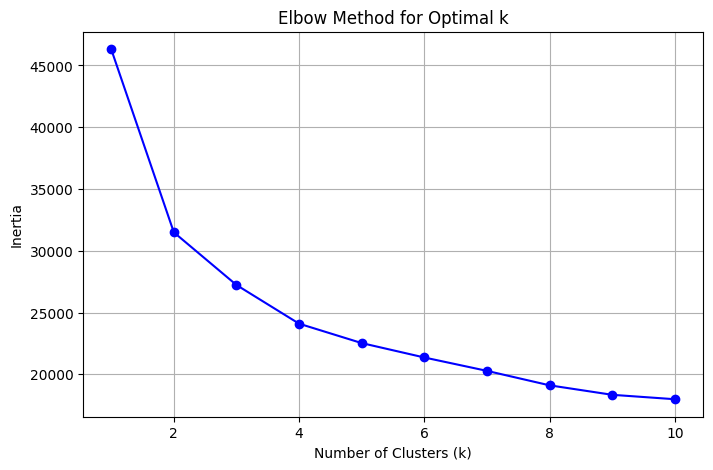

In [19]:
# Drop any rows with remaining NaNs
clustering_df_clean = clustering_df_clean.dropna()

# Re-normalize
scaler = StandardScaler()
clustering_df_scaled = scaler.fit_transform(clustering_df_clean)

# Elbow method to find optimal k
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_df_scaled)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


**K-Means Clustering**

In [34]:
# Use the optimal k from the Elbow chart
optimal_k = 3

# Run KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(clustering_df_scaled)


# Add cluster labels to the original (cleaned) DataFrame
clustering_df_clean['kmeans_cluster'] = kmeans_labels

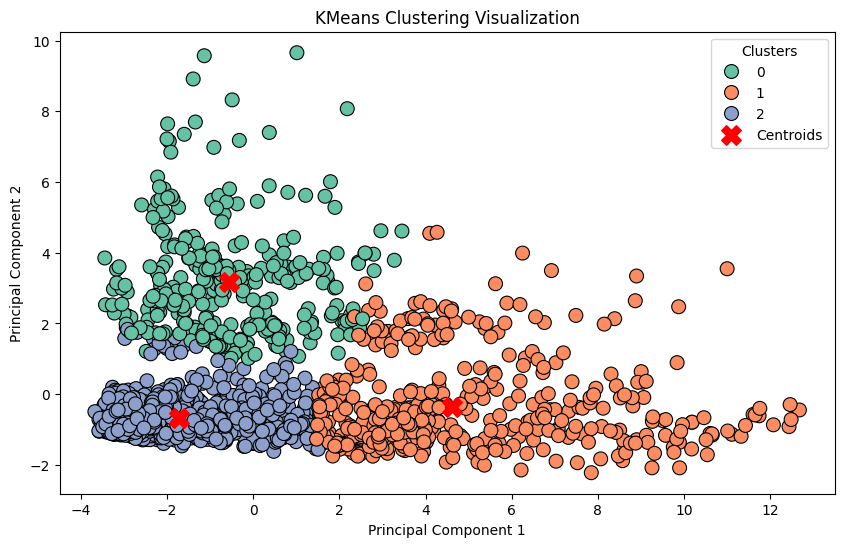

kmeans_cluster
2    1260
1     512
0     333
Name: count, dtype: int64
Silhouette Score for K-Means: 0.2893201234903751


In [35]:
pca = PCA(n_components=2)
clustering_df_scaled_2d = pca.fit_transform(clustering_df_scaled)


# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot KMeans clusters
sns.scatterplot(
    x=clustering_df_scaled_2d[:, 0],
    y=clustering_df_scaled_2d[:, 1],
    hue=clustering_df_clean['kmeans_cluster'],
    palette='Set2',
    marker='o',
    s=100,
    edgecolor='k',
    legend="full"
)

# Plot the centroids
centroids = kmeans.cluster_centers_
centroids_2d = pca.transform(centroids) if clustering_df_scaled.shape[1] > 2 else centroids

plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('KMeans Clustering Visualization')
plt.xlabel('Principal Component 1' if clustering_df_scaled.shape[1] > 2 else 'Feature 1')
plt.ylabel('Principal Component 2' if clustering_df_scaled.shape[1] > 2 else 'Feature 2')

# Show the plot
plt.legend(title="Clusters")
plt.show()

print(clustering_df_clean['kmeans_cluster'].value_counts())
print(f"Silhouette Score for K-Means: {silhouette_score(clustering_df_scaled, clustering_df_clean['kmeans_cluster'])}")

**DBSCAN Clustering**

In [22]:
# Run DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=15)
dbscan_labels = dbscan.fit_predict(clustering_df_scaled)

# DBSCAN cluster labels to the DataFrame
clustering_df_clean['dbscan_cluster'] = dbscan_labels

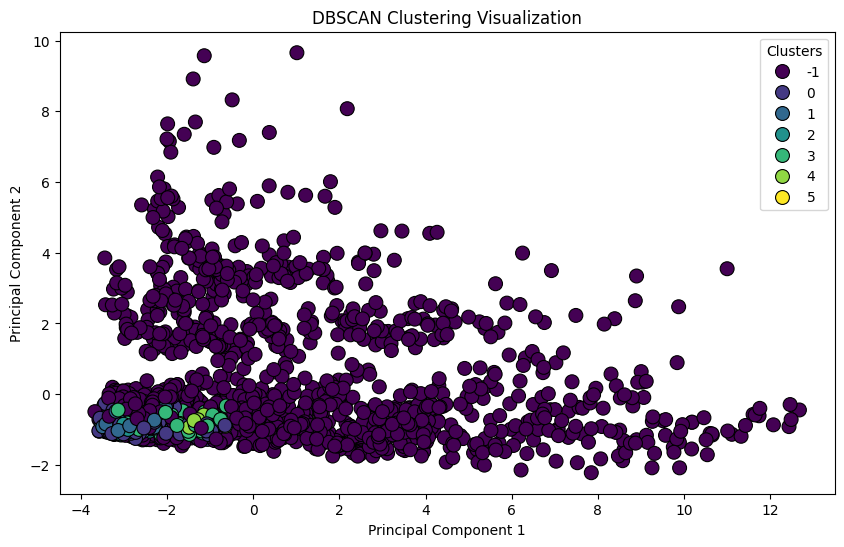

dbscan_cluster
-1    1470
 0     272
 3     146
 1      88
 2      69
 4      48
 5      12
Name: count, dtype: int64
Silhouette Score for DBSCAN: -0.11560634271507204


In [36]:
if clustering_df_scaled.shape[1] > 2:
    pca = PCA(n_components=2)
    clustering_df_scaled_2d = pca.fit_transform(clustering_df_scaled)
else:
    clustering_df_scaled_2d = clustering_df_scaled

# Add the DBSCAN labels to the DataFrame for plotting
clustering_df_clean['dbscan_cluster'] = dbscan_labels

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot DBSCAN clusters
sns.scatterplot(
    x=clustering_df_scaled_2d[:, 0],
    y=clustering_df_scaled_2d[:, 1],
    hue=clustering_df_clean['dbscan_cluster'],
    palette='viridis',
    marker='o',
    s=100,
    edgecolor='k',
    legend="full"
)

plt.title('DBSCAN Clustering Visualization')
plt.xlabel('Principal Component 1' if clustering_df_scaled.shape[1] > 2 else 'Feature 1')
plt.ylabel('Principal Component 2' if clustering_df_scaled.shape[1] > 2 else 'Feature 2')

# Show the plot
plt.legend(title="Clusters")
plt.show()

print(clustering_df_clean['dbscan_cluster'].value_counts())
print(f"Silhouette Score for DBSCAN: {silhouette_score(clustering_df_scaled, clustering_df_clean['dbscan_cluster'])}")


In [24]:
# Filter only numeric columns for aggregation
numerical_columns = clustering_df_clean.select_dtypes(include=['number']).columns

cluster_summary = clustering_df_clean.groupby('kmeans_cluster')[numerical_columns].mean()

# Print the summary
cluster_summary

,age,married,has_children,total_sessions,avg_clicks,flights_booked,hotels_booked,total_cancellations,total_session_time,avg_session_duration,...,total_hotel_spent,total_spent,discount_sensitivity,total_bookings,booking_ratio,spending_per_session,discount_ratio,avg_nights_per_booking,kmeans_cluster,dbscan_cluster
kmeans_cluster,,,,,,,,,,,,,,,,,,,,,
0,45.053254,0.429980,0.319527,63.743590,16.485582,22.642998,21.942801,0.0,7811.071006,122.763116,...,30837.287515,40240.760355,0.005010,44.585799,0.683423,660.237316,1.537514e-06,3.069691,0.0,-1.000000
1,42.885993,0.501629,0.358306,28.703583,14.407427,6.785016,7.631922,0.0,3136.488599,107.262248,...,11870.915700,15251.070749,0.053192,14.416938,0.452045,516.810044,3.067006e-05,3.977470,1.0,-1.000000
2,42.008826,0.465137,0.380406,18.211827,13.723036,3.789056,3.664607,0.0,1896.436893,102.283142,...,3586.667008,5258.135207,0.000477,7.453663,0.335243,238.909306,2.001964e-07,2.995146,2.0,0.368932
3,45.202532,0.481013,0.246835,104.265823,17.927089,46.803797,46.740506,0.0,13935.607595,133.334367,...,90313.112785,109121.198481,0.003418,93.544304,0.881716,1103.130369,7.149749e-07,3.467722,3.0,-1.000000


In [25]:
cluster_sizes = clustering_df_clean['kmeans_cluster'].value_counts().sort_index()
print("Cluster sizes:\n", cluster_sizes)

Cluster sizes:
 kmeans_cluster
0     507
1     307
2    1133
3     158
Name: count, dtype: int64


**Customer Segmentation Report for Marketing Offer Strategy**

**Overview:**
This analysis segments customers into three distinct clusters using K-Means clustering on behavioral and transactional data. Our goal is to identify actionable marketing offers to improve customer retention and engagement.

---

**Cluster Profiles & Recommendations**

**▶ Cluster 0 – Moderate Travelers**  
**Customer Traits:**  
- Average number of sessions (~ 31) and bookings (~16)
- Moderate spenders (~$17,731 total)
- Families (36% have children)
- Moderate bag usage (~4.25 checked bags)
- Slight discount sensitivity

**Recommended Offer:**  
**✅ Free Checked Bag**  
This segment travels regularly and would appreciate practical savings. A free bag can boost trip satisfaction without significant cost impact.

---

**▶ Cluster 1 – Heavy Spenders & Frequent Flyers**  
**Customer Traits:**  
- Very high engagement (~ 81 sessions, ~64 bookings)
- Extremely high spend (~$65,450 total)
- Long session times and high loyalty
- No significant discount sensitivity

**Recommended Offer:**  
**✅ 1-Night Free Hotel with Flight**  
This is a premium segment that values high-quality rewards. The offer encourages extended trips and reinforces loyalty.

---

**▶ Cluster 2 – Light Users & Budget-Conscious**  
**Customer Traits:**  
- Low number of sessions (~ 21) and bookings (~9)
- Lowest total spend (~$7,038)
- Family travel present (37%)
- High churn risk and price sensitivity

**Recommended Offer:**  
**✅ Exclusive Discounts or No Cancellation Fees**  
This group needs motivation to engage. Price-based incentives and flexible booking terms can activate and convert them.

---

**Additional Optional Offers by Cluster:**

| Offer                   | Ideal Cluster | Rationale                              |
|------------------------|----------------|----------------------------------------|
| Free Hotel Meal        | Cluster 0       | They stay in hotels often              |
| Free Checked Bag       | Cluster 0       | Families, practical incentive          |
| No Cancellation Fees   | Cluster 2       | Risk-averse, low-confidence bookers    |
| Exclusive Discounts    | Cluster 2       | Price-sensitive, low loyalty           |
| 1-Night Free Hotel     | Cluster 1       | Premium-tier, loyalty reinforcement    |

---

**Summary:**
K-Means clustering has effectively divided customers into meaningful segments. Cluster 1 is the highest value group and should be rewarded. Cluster 2 presents an opportunity for reactivation, and Cluster 0 can be nudged toward higher engagement with practical offers.

**Preferred Model:** K-Means  
**Silhouette Score:** 0.29  
**(DBSCAN not recommended due to poor performance.)**





In [26]:
print(clustering_df_clean.columns)

Index(['age', 'married', 'has_children', 'total_sessions', 'avg_clicks',
       'flights_booked', 'hotels_booked', 'total_cancellations',
       'total_session_time', 'avg_session_duration', 'checked_bags', 'nights',
       'flight_discount_amount', 'hotel_discount_amount', 'total_flight_spent',
       'total_hotel_spent', 'total_spent', 'discount_sensitivity',
       'total_bookings', 'booking_ratio', 'spending_per_session',
       'discount_ratio', 'avg_nights_per_booking', 'kmeans_cluster',
       'dbscan_cluster'],
      dtype='object')


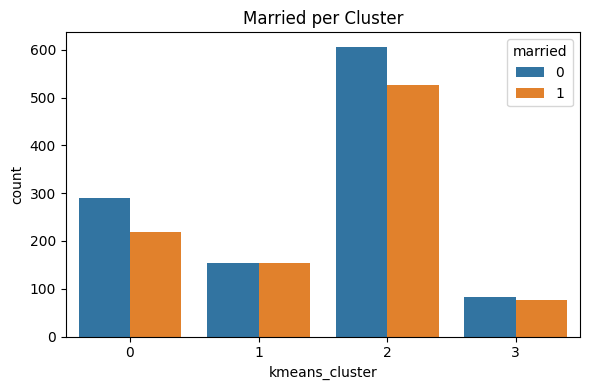

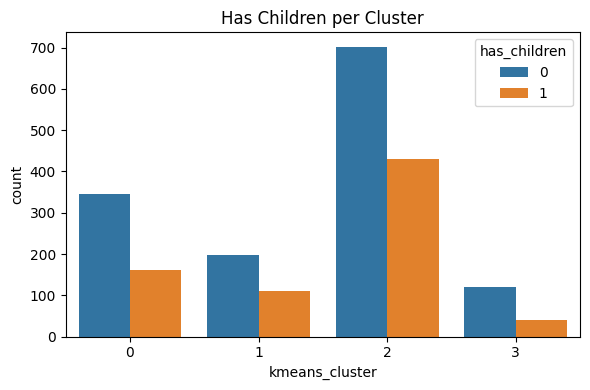

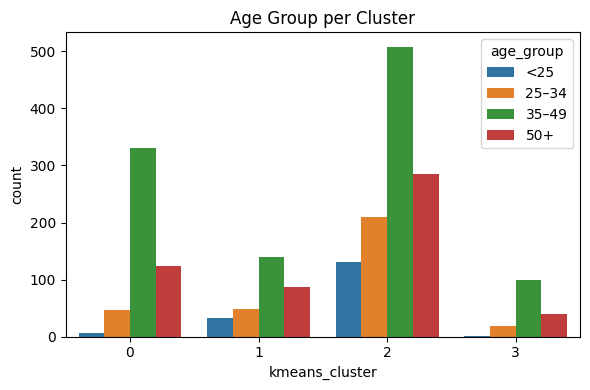

In [27]:
bins = [0, 25, 35, 50, 100]
labels = ['<25', '25–34', '35–49', '50+']
clustering_df_clean['age_group'] = pd.cut(clustering_df_clean['age'], bins=bins, labels=labels)
categorical_features = ['married', 'has_children', 'age_group']  # добавь другие при необходимости

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='kmeans_cluster', hue=feature, data=clustering_df_clean)
    plt.title(f'{feature.replace("_", " ").title()} per Cluster')
    plt.tight_layout()
    plt.show()


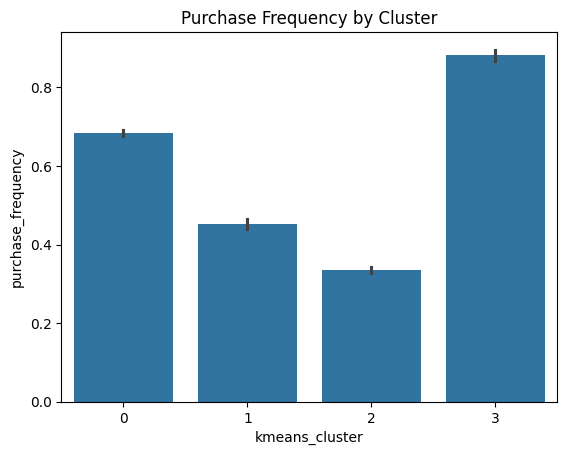

In [28]:
clustering_df_clean['purchase_frequency'] = clustering_df_clean['total_bookings'] / clustering_df_clean['total_sessions']
sns.barplot(x='kmeans_cluster', y='purchase_frequency', data=clustering_df_clean)
plt.title('Purchase Frequency by Cluster')
plt.show()

**Engagement Metrics Analysis by Cluster**



*  Clusters with high total sessions and total session time are likely more engaged and may represent loyal or returning users. These clusters may require less effort for retention strategies.

*   Clusters with longer average session durations may be more deeply engaged, possibly showing a strong interest in the platform’s offerings, which could signal a need for personalized content or features.


*   Clusters with longer average session durations may be more deeply engaged, possibly showing a strong interest in the platform’s offerings, which could signal a need for personalized content or features.

*   High booking ratio clusters may represent high-converting users, which suggests that marketing or promotional strategies could be tailored to target similar users in other clusters.

* Clusters with higher spending per session are valuable for business growth. These segments should be prioritized in marketing and loyalty programs.

  This analysis helps identify how different clusters interact with the platform, giving actionable insights into user behavior and highlighting areas for improving engagement and revenue generation strategies.

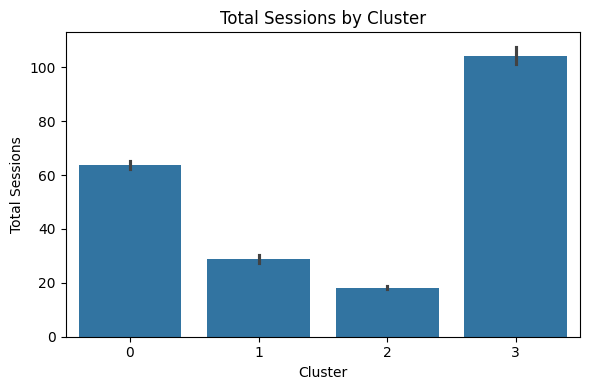

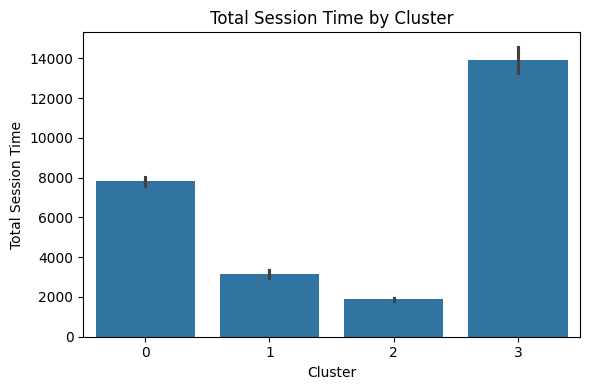

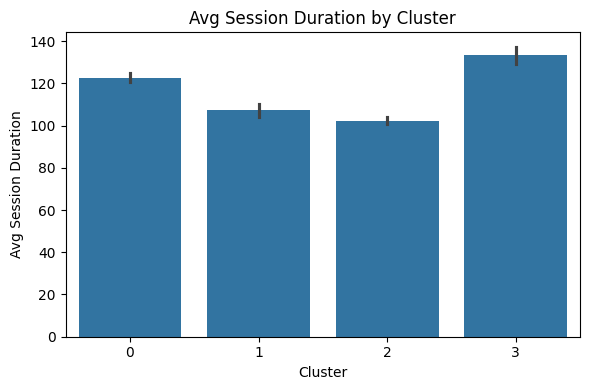

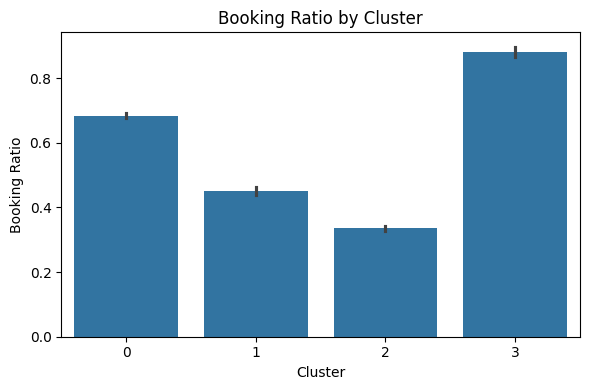

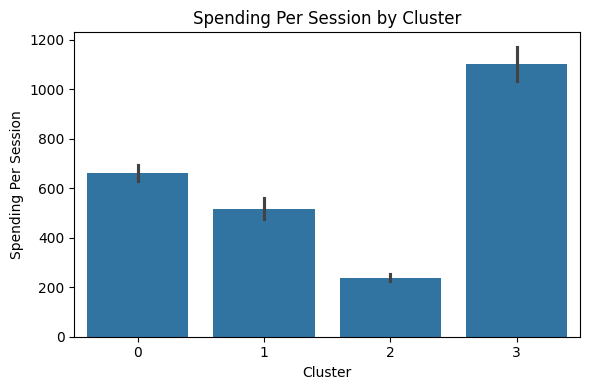

In [29]:
engagement_metrics = [
    'total_sessions',
    'total_session_time',
    'avg_session_duration',
    'booking_ratio',
    'spending_per_session'
]

for metric in engagement_metrics:
    plt.figure(figsize=(6, 4))
    sns.barplot(x='kmeans_cluster', y=metric, data=clustering_df_clean)
    plt.title(f'{metric.replace("_", " ").title()} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(metric.replace("_", " ").title())
    plt.tight_layout()
    plt.show()

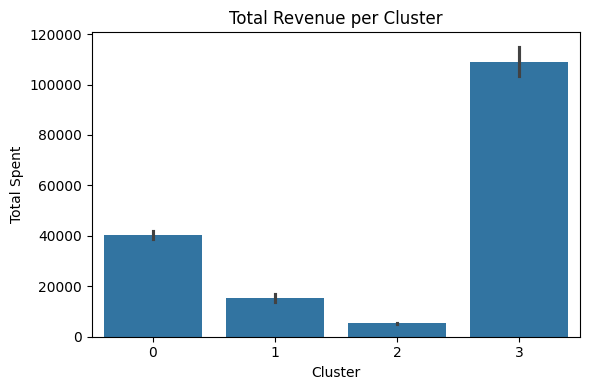

In [30]:
plt.figure(figsize=(6, 4))
sns.barplot(x='kmeans_cluster', y='total_spent', data=clustering_df_clean)
plt.title('Total Revenue per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Spent')
plt.tight_layout()
plt.show()

**Total Revenue per Cluster**

The bar plot allows us to compare the total revenue generated by different clusters.

* Clusters with higher bars indicate that users in those clusters contribute significantly more to total revenue, while clusters with lower bars represent segments with comparatively lower spending.

This type of analysis is valuable because it helps identify high-value segments of customers that are more profitable. Based on this, the business could:

* Target high-revenue clusters with specialized offers, exclusive promotions, or personalized content to further drive spending.

Analyze low-revenue clusters to understand the barriers preventing them from spending more and consider strategies to increase their engagement or conversion rates.

In [31]:
clustering_df_clean.groupby('kmeans_cluster')[
    ['total_spent', 'booking_ratio', 'discount_sensitivity']
].mean().round(2)

,total_spent,booking_ratio,discount_sensitivity
kmeans_cluster,,,
0,40240.76,0.68,0.01
1,15251.07,0.45,0.05
2,5258.14,0.34,0.00
3,109121.20,0.88,0.00


**Key Takeaways:**

* Cluster 1 stands out with high total spending and booking ratio, making it the most valuable segment in terms of revenue. This group might be loyal customers or high-value users, and therefore should be prioritized for loyalty programs or exclusive offers.

* Cluster 0 has moderate engagement and spending but might benefit from targeted offers or campaigns to boost conversion rates and revenue.

* Cluster 2 shows low engagement and spending, so this cluster might need special attention in terms of improved user experience or incentives to increase engagement and conversions.

**Business Implications:**
---
Targeting high-value segments (Cluster 1) with premium services or personalized offers could increase retention and lifetime value.

Cluster 0 can be targeted with campaigns aimed at increasing conversions and possibly incentivizing them with discounts or loyalty rewards.

Cluster 2, being the least engaged, might require re-engagement strategies such as special promotions, targeted advertisements, or better user experience to increase bookings and spending.



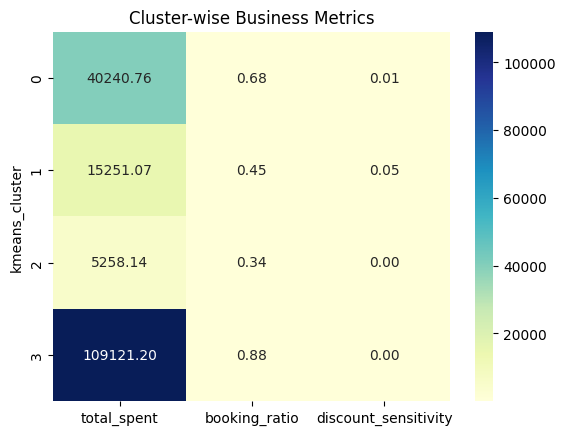

In [32]:
cluster_summary = clustering_df_clean.groupby('kmeans_cluster')[
    ['total_spent', 'booking_ratio', 'discount_sensitivity']
].mean()

sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Cluster-wise Business Metrics')
plt.show()

In [33]:
cluster_summary

,total_spent,booking_ratio,discount_sensitivity
kmeans_cluster,,,
0,40240.760355,0.683423,0.005010
1,15251.070749,0.452045,0.053192
2,5258.135207,0.335243,0.000477
3,109121.198481,0.881716,0.003418
